In [4]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import scipy.stats as stats

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [6]:
filename='Phycocyanin_2008.csv'
phycocyanin=pd.read_csv(filename,delimiter=';',skiprows=1) #read csv with phycocyanin absobances
phycocyanin=np.array(phycocyanin)[0][1:-1] #to array

In [7]:
filename='spectra_2008c.csv'

od = pd.read_csv(filename,delimiter=',',skiprows=2,header=None) #read spectrum
od=np.array(od) #to array

for i in range(len(od)):
    od[i][1:]=od[i][1:]*2 #double all absorbances (2:1 dilution)

In [8]:
od750=od[od[:,0]==750] #only OD750

od750=np.array(od750)[0,1:] #to array

In [9]:
norm_phyco=phycocyanin/od750 #normalize to OD750

In [10]:
x_value=[]
means=[]
i=0
x=0

#phycocyanin[7]=phycocyanin[8]

#means of biological triplicates
while i < len(phycocyanin):
    x_value.append([x+1]*len(phycocyanin[i:i+3]))
    means.append(phycocyanin[i:i+3].sum()/len(phycocyanin[i:i+3]))
    i+=3
    x+=1
    


In [11]:
#labels
labeli=['$\Delta shc$_EVC',
 '$\Delta shc$_SQS1',
 'GT-V_EVC',
 'GT-V_SQS',
 'GT-U_EVC',
 'GT-U_SQS',
 '$\Delta shc$_SQS2']

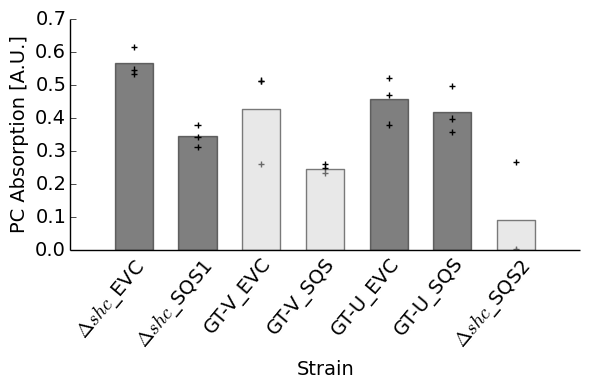

In [12]:
from matplotlib.ticker import MaxNLocator

i=0
x=1

ax = plt.subplot(111)

while i < len(phycocyanin):
    ax.scatter([x]*3,phycocyanin[i:i+3],marker='+',c='k') #plot data points
    i+=3
    x+=1

#barplot
ax.bar(np.array(range(1,len(means)+1))-0.3,means,color=['k','k','lightgray','lightgray','k','k','lightgray'],width=0.6, alpha=0.5)

#format plot
plt.yticks(fontsize=14)
plt.xticks(np.array(range(1,len(means)+1))-0.35,labeli,rotation=50,fontsize=14) #xticks
plt.tight_layout()
plt.ylabel('PC Absorption [A.U.]',fontsize=14)
plt.xlabel('Strain',fontsize=14)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')

#ax.yaxis.set_major_locator(MaxNLocator(3))

plt.ylim(0)

plt.tight_layout()

#save plot
#plt.savefig('phycocyanin.png',bbox_inches='tight',dpi=1000)
